Max[chi^2_SM-chi^2](gzp=0.42551091, theta=-0.14501005)=42.63001726011478


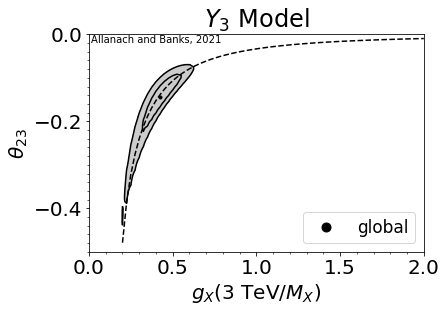

In [5]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.ticker as ticker

# Read in plot 1 data: obtained from 2103.12056
with open('tfhm_2d.dat', 'rb') as filehandle:
    data_for_plot1 = pickle.load(filehandle)
# Identify best-fit point
gzp_for_plot1  =  [data['gzp']      for data in data_for_plot1]
theta_for_plot1 = [data['theta']   for data in data_for_plot1]
dchi2_for_plot1 = [2*data['global']   for data in data_for_plot1]
max_D_old   = max(dchi2_for_plot1)
pos        = dchi2_for_plot1.index(max_D_old)
max_dchi2   = 2 * 21.31500863005739
gzp_gf     = 0.42551091
theta_gf   = -0.14501005
print('Max[chi^2_SM-chi^2](gzp=' + str(gzp_gf) + ', theta=' + str(theta_gf) + ')=' + str(max_dchi2))

# Plot 70%/95% contours for global fit
x = np.array(gzp_for_plot1)
y = np.array(theta_for_plot1)
z = np.array(dchi2_for_plot1)

cols = np.unique(x).shape[0]
X = x.reshape(-1, cols)
Y = y.reshape(-1, cols)
Z = z.reshape(-1, cols)

x1 = np.unique(x)[8:]
F = 0.5 * np.arcsin(-0.09 / ((x1)**2+0.35*x1))

# make plot
plt.rcParams.update({'font.size': 20}) 
fig,ax = plt.subplots()
plt.rcParams['contour.negative_linestyle'] = 'solid'
alpha_level = 0.2
contourf_ = ax.contourf(X, Y, Z, [max_dchi2-5.99, max_dchi2], colors='k',   alpha=alpha_level)
contour_  = ax.contour (X, Y, Z, [max_dchi2-5.99, max_dchi2-2.41], colors='k')
plt.rcParams.update({'font.size': 16}) 
plt.plot(gzp_gf, theta_gf,'k.', label='global')
plt.rcParams.update({'font.size': 20}) 
plt.xlabel(r'$g_{X}$(3 TeV/$M_{X}$)') 
plt.ylabel(r'$\theta_{23}$') 
plt.title('$Y_3$ Model')
plt.legend(loc='lower right',markerscale=3, fontsize=17)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.plot(x1,F,'k--')
plt.text(0.01, -0.02, "Allanach and Banks, 2021", fontsize=10)
plt.savefig('tfhm_fit.pdf', bbox_inches = "tight")